# partial_dependence_demo

## Studying ways to get partial dependence information in Python

Let us study different ways to get partial dependence plots in Python. Let us start with `pdpbox`, a package which produces Individual Conditional Expectation Plots. Furthermore, let us try also to build our own partial dependence function.

In [1]:
# magics to make plots inline
%matplotlib inline

# importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

## Data & Model 

Let us generate some data and fit a model to it.

In [2]:
# generating the data
X, y = make_classification(n_samples=5000, n_informative=2, n_clusters_per_class=1, class_sep=0.80, random_state=20180402)

# making it a pandas dataframe
X = pd.DataFrame(X); y = pd.Series(y)
X.columns = X.columns.astype(str)

In [3]:
# fitting the random forest
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [4]:
# getting variable importance
pd.DataFrame({'var': range(X.shape[1]), 'imp': rf.feature_importances_}).sort_values('imp', ascending=False)

,imp,var
5,0.320162,5
10,0.296055,10
15,0.071550,15
14,0.046825,14
12,0.018046,12
17,0.017724,17
3,0.017599,3
9,0.017438,9
2,0.017424,2
7,0.017168,7


## First try with `pdpbox`

Let us play with pdpbox.

In [5]:
# importing it
from pdpbox import pdp

##### Let us start with a simple partial dependence plot

In [6]:
# let us check with the most important variable
pdp_single = pdp.pdp_isolate(rf, X, '10')

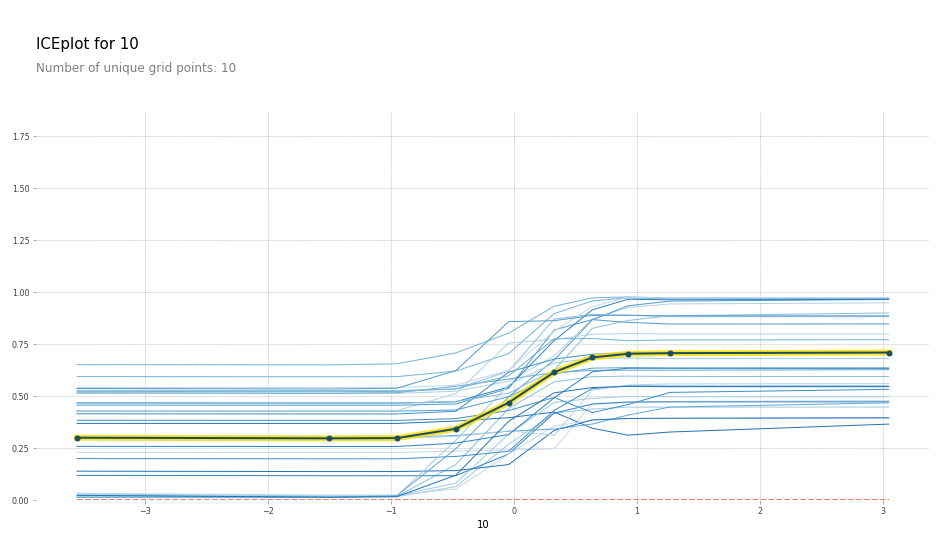

In [7]:
# plotting
pdp.pdp_plot(pdp_single, '10', center=False, plot_lines=True, frac_to_plot=1.0, cluster=True, n_cluster_centers=30)

##### Let us now uncover interactions

In [8]:
# let us do with the two most important variables
pdp_twoway = pdp.pdp_interact(rf, X, ['10','5'])

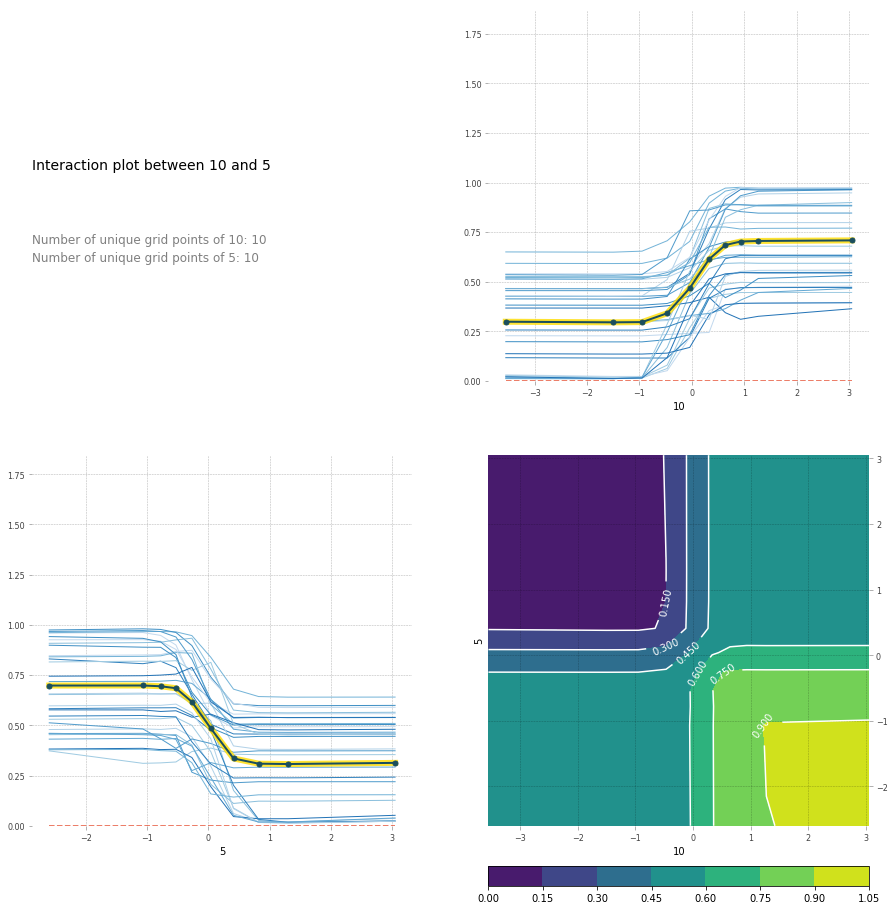

In [9]:
# plotting
pdp.pdp_interact_plot(pdp_twoway, ['10','5'], center=False, plot_lines=True, frac_to_plot=1.0, cluster=True, n_cluster_centers=30)